<a href="https://colab.research.google.com/github/Saba-a11/Machine-Learning/blob/master/CustomerPersonalityAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
ls

marketing_campaign.csv  sample_data/


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")

In [25]:
pd.options.display.max_columns = None
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Attributes

**People**

- **ID:** Customer's unique identifier
- **Year_Birth:** Customer's birth year
- **Education:** Customer's education level
- **Marital_Status:** Customer's marital status
- **Income:** Customer's yearly household income
- **Kidhome:** Number of children in customer's household
- **Teenhome:**Number of teenagers in customer's household
- **Dt_Customer:** Date of customer's enrollment with the company
- **Recency:** Number of days since customer's last purchase
- **Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- **MntWines:** Amount spent on wine in last 2 years
- **MntFruits:** Amount spent on fruits in last 2 years
- **MntMeatProducts:** Amount spent on meat in last 2 years
- **MntFishProducts:** Amount spent on fish in last 2 years
- **MntSweetProducts:** Amount spent on sweets in last 2 years
- **MntGoldProds:** Amount spent on gold in last 2 years

**Promotion**

- **NumDealsPurchases:** Number of purchases made with a discount
- **AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- **NumWebPurchases:** Number of purchases made through the company’s website
- **NumCatalogPurchases:** Number of purchases made using a catalogue
- **NumStorePurchases:** Number of purchases made directly in stores
- **NumWebVisitsMonth:** Number of visits to company’s website in the last month

In [6]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
pd.options.display.max_columns = None
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.describe(include=['O'])

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [53]:
# For clarity

df = df.rename(
    columns={
        "MntWines": "Wines",
        "MntFruits": "Fruits",
        "MntMeatProducts": "Meat",
        "MntFishProducts": "Fish",
        "MntSweetProducts": "Sweets",
        "MntGoldProds": "Gold",
        'AcceptedCmp1': 'Cmp1',
        'AcceptedCmp2': 'Cmp2',
        'AcceptedCmp3': 'Cmp3',
        'AcceptedCmp4': 'Cmp4',
        'AcceptedCmp5': 'Cmp5',

    }
)

In [ ]:
columns_of_interest = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain',
                       'Wines', 'Fruits', 'Meat', 'Fish',
                       'Sweets', 'Gold', 'NumDealsPurchases',
                       'Cmp1', 'Cmp2', 'Cmp3', 'Cmp4', 'Cmp5', 'Response',
                       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
correlation_matrix = df[columns_of_interest].corr()
correlation_matrix

,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Year_Birth,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.030128,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818,-0.060846,-0.005930,-0.006539,0.061774,-0.060510,0.007123,0.021325,-0.145040,-0.121275,-0.128272,0.121139
Income,-0.161791,1.000000,-0.428669,0.019133,-0.003970,-0.027225,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.276820,0.087545,-0.016174,0.184400,0.335943,0.133047,0.387878,0.589162,0.529362,-0.553088
Kidhome,0.230176,-0.428669,1.000000,-0.036133,0.008827,0.040207,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595,0.221798,-0.172339,-0.081716,0.014674,-0.161600,-0.205634,-0.080008,-0.361647,-0.502237,-0.499683,0.447846
Teenhome,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.003138,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725,0.387741,-0.140090,-0.015605,-0.042677,0.038886,-0.191050,-0.154446,0.155500,-0.110769,0.050695,0.134884
Recency,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.013231,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693,-0.001098,-0.019283,-0.001781,-0.032991,0.018826,0.000129,-0.198437,-0.010726,0.025110,0.000799,-0.021445
Complain,-0.030128,-0.027225,0.040207,0.003138,0.013231,1.000000,-0.039007,-0.005166,-0.023483,-0.020953,-0.022485,-0.030861,0.000420,-0.025499,-0.011334,0.008415,-0.027611,-0.009419,-0.001707,-0.016310,-0.020453,-0.016524,0.019769
MntWines,-0.157773,0.578650,-0.496297,0.004846,0.016064,-0.039007,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516,0.010940,0.354133,0.205907,0.062202,0.373286,0.472613,0.247254,0.542265,0.635226,0.642100,-0.320653
MntFruits,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,-0.005166,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995,-0.132114,0.194748,-0.009773,0.014727,0.010152,0.215833,0.125289,0.296735,0.487917,0.461758,-0.418383
MntMeatProducts,-0.030872,0.584633,-0.437129,-0.261160,0.023056,-0.023483,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609,-0.122415,0.309761,0.043033,0.018272,0.102912,0.373769,0.236335,0.293761,0.723827,0.479659,-0.539470
MntFishProducts,-0.041625,0.438871,-0.387644,-0.204187,0.001079,-0.020953,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875,-0.139361,0.260762,0.002577,0.000357,0.016843,0.199578,0.111331,0.293681,0.534478,0.459855,-0.446003


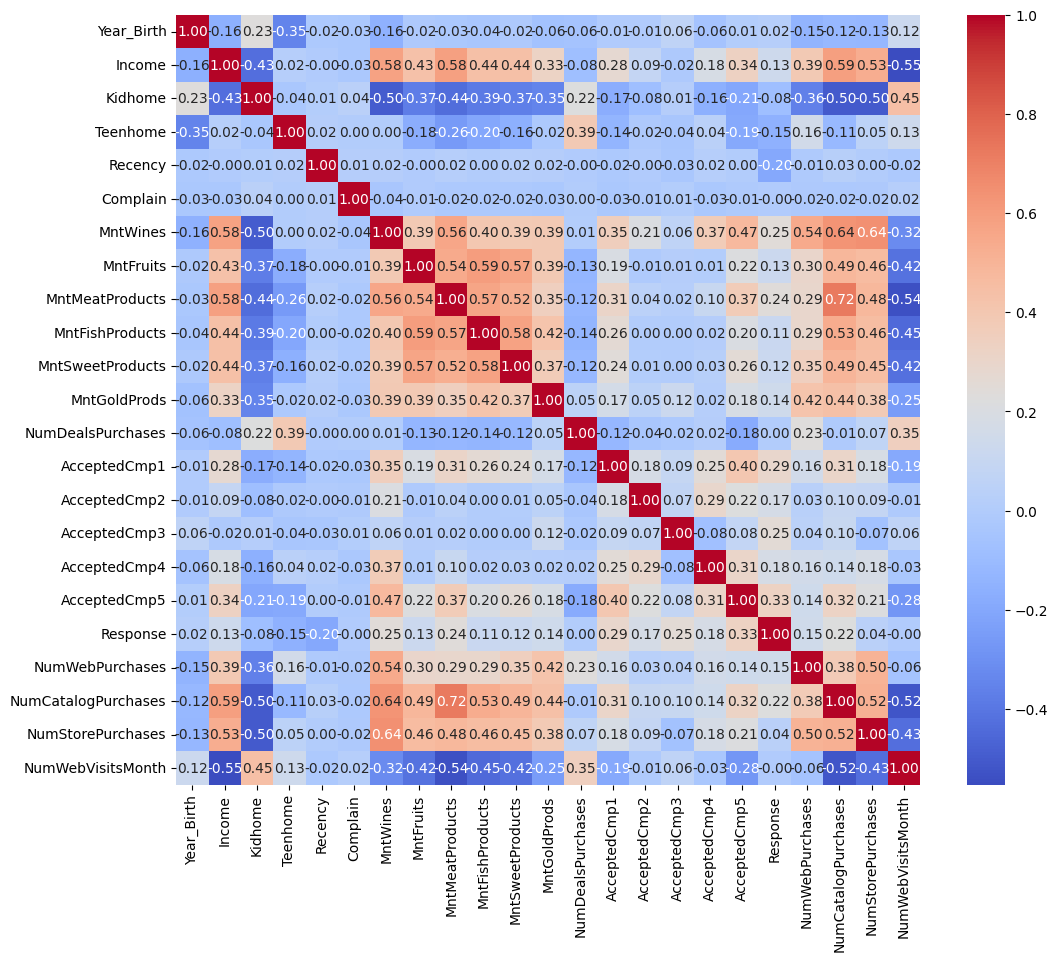

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [ ]:
columns_of_interest = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain',
                       'Wines', 'Fruits', 'Meat', 'Fish',
                       'Sweets', 'Gold']
correlation_matrix = df[columns_of_interest].corr()
correlation_matrix

,Year_Birth,Income,Kidhome,Teenhome,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Year_Birth,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.030128,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,-0.061818
Income,-0.161791,1.000000,-0.428669,0.019133,-0.003970,-0.027225,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916
Kidhome,0.230176,-0.428669,1.000000,-0.036133,0.008827,0.040207,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,-0.349595
Teenhome,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.003138,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,-0.021725
Recency,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.013231,0.016064,-0.004306,0.023056,0.001079,0.022670,0.016693
Complain,-0.030128,-0.027225,0.040207,0.003138,0.013231,1.000000,-0.039007,-0.005166,-0.023483,-0.020953,-0.022485,-0.030861
MntWines,-0.157773,0.578650,-0.496297,0.004846,0.016064,-0.039007,1.000000,0.389637,0.562667,0.399753,0.386581,0.387516
MntFruits,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,-0.005166,0.389637,1.000000,0.543105,0.594804,0.567164,0.392995
MntMeatProducts,-0.030872,0.584633,-0.437129,-0.261160,0.023056,-0.023483,0.562667,0.543105,1.000000,0.568402,0.523846,0.350609
MntFishProducts,-0.041625,0.438871,-0.387644,-0.204187,0.001079,-0.020953,0.399753,0.594804,0.568402,1.000000,0.579870,0.422875


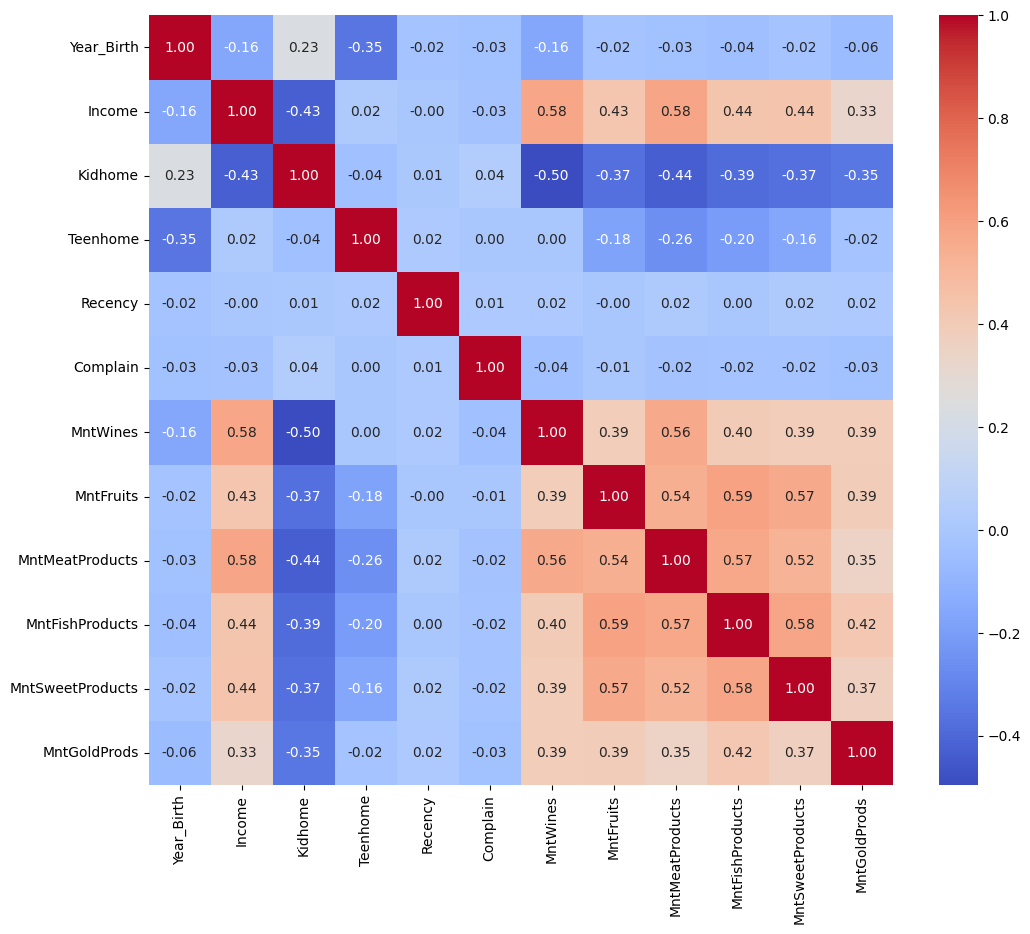

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## Data Cleaning & Data Engineering

- There are missing values in `Income`.
- `Dt_Customer` that indicates the date a customer joined the database is not parsed as DateTime.
- Creating a feature `Customer_For` of the number of days the customers started to shop in the store relative to the last recorded date.
- Extract the `Age` of a customer by the `Year_Birth` indicating the birth year of the respective person.
- Create another feature `Living_With` out of `Marital_Status` to extract the living situation of couples.
- Create a feature `Children` to indicate total children in a household that is, kids and teenagers.
- To get further clarity of household, Creating feature indicating `Family_Size`
Create a feature `Is_Parent` to indicate parenthood status
- Create three categories in the `Education` by simplifying its value counts.
- Dropping some of the redundant feature.
- There are some categorical features in our data frame; as there are some features in `dtype: object`. So we will need to encode them into numeric forms later.

In [41]:
# Count the number of null values

df['Income'].isnull().sum()

24

In [ ]:
# Strategy 1: To remove all null values

# data = data.dropna()

In [42]:
# Strategy 2: Fill null values with the mean for Income column

mean_value = df['Income'].mean()
df['Income'].fillna(mean_value, inplace=True)

In [43]:
# Count the number of null values

df['Income'].isnull().sum()

0

In [44]:
# Change data type from object to datetime

df['Dt_Customer'] = df['Dt_Customer'].apply(
    pd.to_datetime, dayfirst=True, errors="coerce"
)

In [22]:
# Find the data type

df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [24]:
# Dates of the newest and oldest recorded customer

df['Dt_Customer'].agg(['min', 'max'])

min   2012-07-30
max   2014-06-29
Name: Dt_Customer, dtype: datetime64[ns]

In [45]:
def extract_day(date):
    # Extract the date part from the datetime object
    day = date.days
    return day

In [58]:
# Calculate the difference between the maximum date and each date in 'Dt_Customer'
df['Customer_For'] = df['Dt_Customer'].max() - df['Dt_Customer']

# Extract the number of days from the timedelta object
df['Customer_For'] = df['Customer_For'].apply(extract_day)

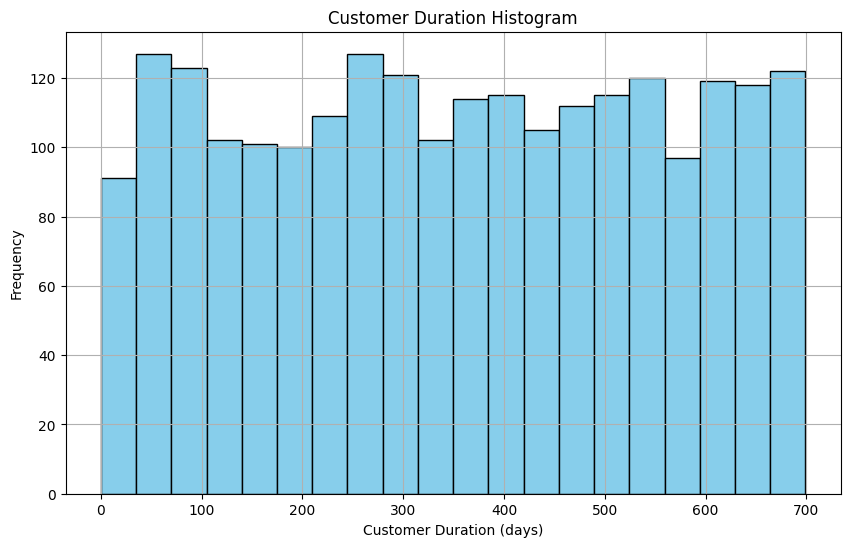

In [59]:
# Plotting the 'customer_for' column

plt.figure(figsize=(10, 6))
plt.hist(df['Customer_For'], bins=20, color='skyblue', edgecolor='black')
plt.title('Customer Duration Histogram')
plt.xlabel('Customer Duration (days)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [47]:
# Create new column Age

df["Age"] = 2024 - df["Year_Birth"]

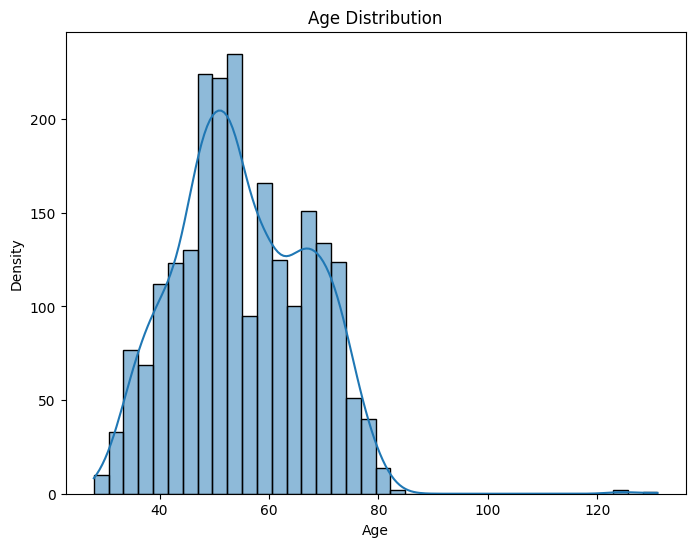

In [30]:
# Plotting the 'Age' column

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Age", kde=True, fill=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

In [31]:
df['Age'].agg(['min', 'max'])

min     28
max    131
Name: Age, dtype: int64

In [48]:
# Deriving living situation by marital status "Alone"

df["Living_With"] = df["Marital_Status"].replace(
    {
        "Married": "Partner",
        "Together": "Partner",
        "Absurd": "Alone",
        "Widow": "Alone",
        "YOLO": "Alone",
        "Divorced": "Alone",
        "Single": "Alone",
    }
)

In [49]:
# Feature indicating total children living in the household

df["Children"] = df["Kidhome"] + df["Teenhome"]

In [50]:
# Feature for total members in the householde

df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2}) + df["Children"]

In [51]:
# Feature pertaining parenthood

df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

In [52]:
# Segmenting education levels in three groups

df["Education"] = df["Education"].replace(
    {
        "Basic": "Undergraduate",
        "2n Cycle": "Undergraduate",
        "Graduation": "Graduate",
        "Master": "Postgraduate",
        "PhD": "Postgraduate",
    }
)

In [55]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Z_CostContact,Z_Revenue,Response,customer_for,Age,Children,Family_Size,Is_Parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,353.582143,55.194196,0.950446,2.595089,0.715179
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,28.000000,0.000000,1.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,180.750000,47.000000,0.000000,2.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,355.500000,54.000000,1.000000,3.000000,1.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,529.000000,65.000000,1.000000,3.000000,1.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,699.000000,131.000000,3.000000,5.000000,1.000000
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,202.122512,11.984069,0.751803,0.906959,0.451430


In [56]:
df.describe(include=['O'])

,Education,Marital_Status,Living_With
count,2240,2240,2240
unique,3,8,2
top,Graduate,Married,Partner
freq,1127,864,1444


In [64]:
# Dropping some of the redundant features
columns_to_keep = [
    'Income',
    'Recency',
    'Wines',
    'Fruits',
    'Meat',
    'Fish',
    'Sweets',
    'Gold',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    	'Cmp3',
      	'Cmp4',
        	'Cmp5',
          	'Cmp1',
            	'Cmp2',
              	'Complain',
                	'Customer_For',
                  	'Age',
                    	'Children',
                      	'Family_Size',
                        	'Is_Parent',
                            'Education',
                            	'Marital_Status',
                              	'Living_With'
]
df1 = df[columns_to_keep]

In [65]:
df1.describe()

,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Customer_For,Age,Children,Family_Size,Is_Parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,353.582143,55.194196,0.950446,2.595089,0.715179
std,25037.797168,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,202.122512,11.984069,0.751803,0.906959,0.451430
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,1.000000,0.000000
25%,35538.750000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.750000,47.000000,0.000000,2.000000,0.000000
50%,51741.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,355.500000,54.000000,1.000000,3.000000,1.000000
75%,68289.750000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,529.000000,65.000000,1.000000,3.000000,1.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,699.000000,131.000000,3.000000,5.000000,1.000000


In [66]:
df1.describe(include=['O'])

,Education,Marital_Status,Living_With
count,2240,2240,2240
unique,3,8,2
top,Graduate,Married,Partner
freq,1127,864,1444


### Income

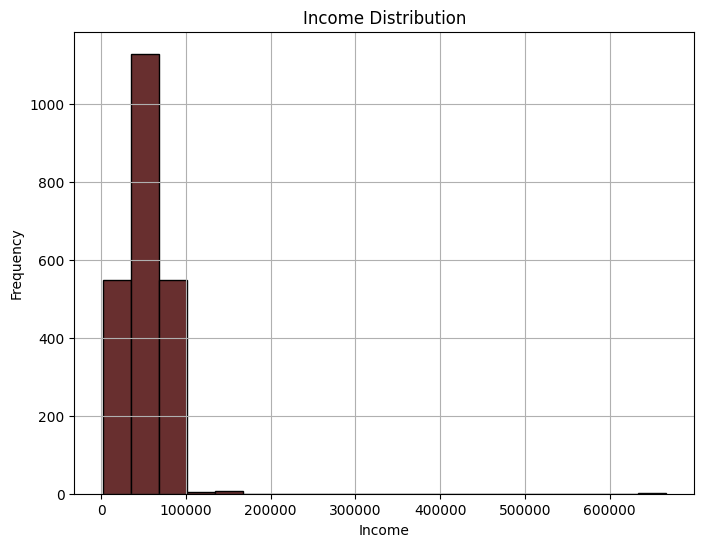

In [68]:
# Plotting the 'Income' column

plt.figure(figsize=(8, 6))
plt.hist(df1['Income'], bins=20, color='#682F2F', edgecolor='black')  # Adjust bins as needed
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [69]:
df['Income'].agg(['min', 'max'])

min      1730.0
max    666666.0
Name: Income, dtype: float64

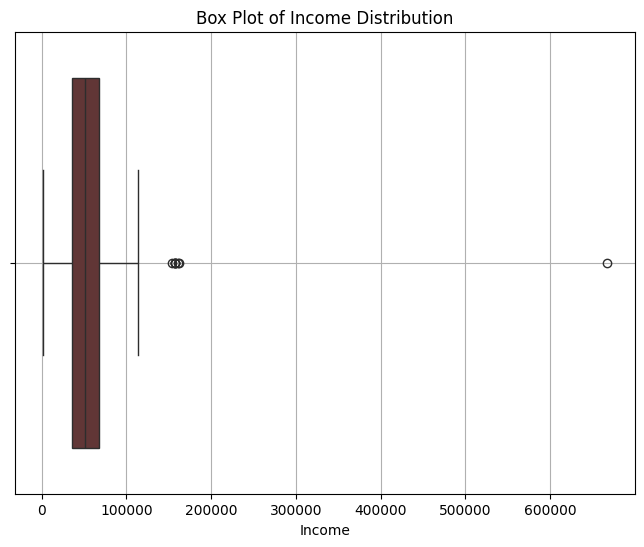

In [70]:
# Plotting the box plot for 'Income' column

plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['Income'], color='#682F2F')
plt.title('Box Plot of Income Distribution')
plt.xlabel('Income')
plt.grid(True)
plt.show()

In [76]:
df1[['Income']].describe([0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,Income
count,2240.000000
mean,52247.251354
std,25037.797168
min,1730.000000
25%,35538.750000
50%,51741.500000
75%,68289.750000
85%,75534.900000
90%,79800.300000
95%,83927.000000


In [77]:
df1.loc[df1['Income'] > 100000, 'Income'] = 100000

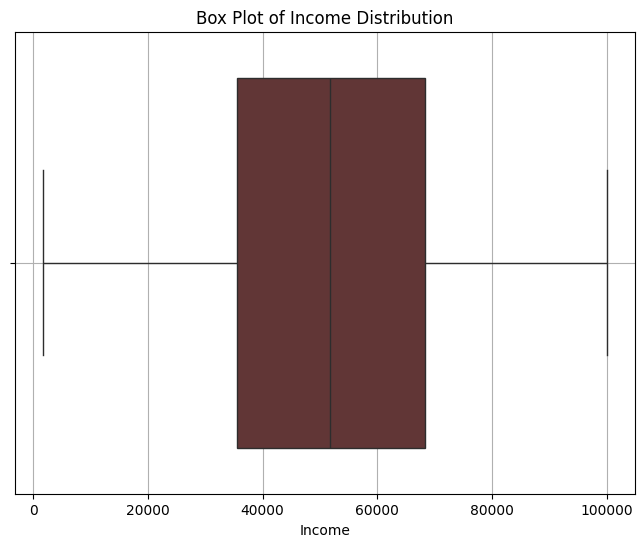

In [78]:
# Plotting the box plot for 'Income' column

plt.figure(figsize=(8, 6))
sns.boxplot(x=df1['Income'], color='#682F2F')
plt.title('Box Plot of Income Distribution')
plt.xlabel('Income')
plt.grid(True)
plt.show()